Atharva Mankame [21BAI1780]

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('Fertilizer Prediction.csv')

In [29]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [30]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [31]:
df.duplicated().sum()

0

In [32]:
df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

In [33]:
cols = df.columns
cat_cols = [col for col in df.columns if df[col].dtype =='object']
num_cols = list(set(df.columns)-set(cat_cols))

EDA


<Axes: xlabel='Temparature', ylabel='Humidity '>

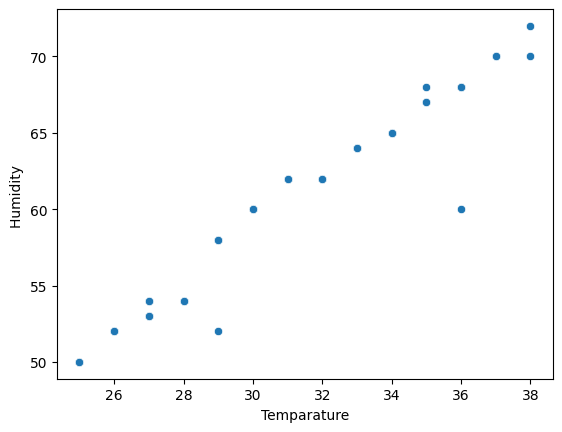

In [34]:
sns.scatterplot(y= df['Humidity '],x = df['Temparature'])

<ipython-input-35-c8fc85f37ac1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crops = df.groupby('Fertilizer Name').sum()


<Axes: xlabel='Fertilizer Name'>

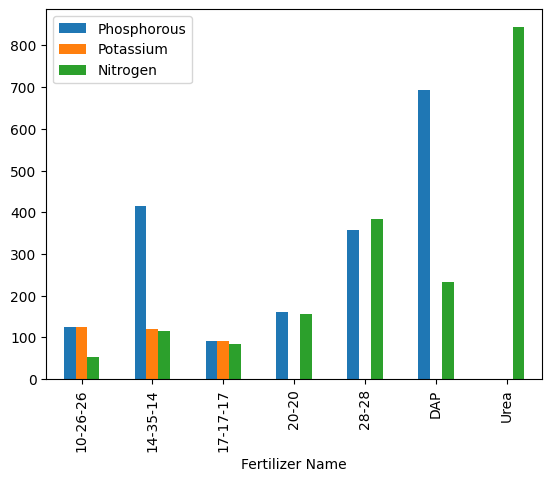

In [35]:
crops = df.groupby('Fertilizer Name').sum()
crops[['Phosphorous','Potassium','Nitrogen']].plot(kind = 'bar')

In [36]:
mapping= ['Urea','DAP','28-28','14-35-14','20-20','17-17-17','10-26-26']
to = [0,1,2,3,4,5,6]

CATEGORICAL TO NUMERICAL 

In [37]:
from sklearn.preprocessing import OrdinalEncoder
encoder= OrdinalEncoder()
df[cat_cols]= encoder.fit_transform(df[cat_cols])
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4.0,3.0,37,0,0,6.0
1,29,52,45,2.0,8.0,12,0,36,5.0
2,34,65,62,0.0,1.0,7,9,30,1.0
3,32,62,34,3.0,9.0,22,0,20,4.0
4,28,54,46,1.0,6.0,35,0,0,6.0
...,...,...,...,...,...,...,...,...,...
94,25,50,32,1.0,7.0,24,0,19,4.0
95,30,60,27,3.0,9.0,4,17,17,0.0
96,38,72,51,2.0,10.0,39,0,0,6.0
97,36,60,43,4.0,4.0,15,0,41,5.0


In [38]:
cat_cols.remove("Fertilizer Name")

In [39]:
df['Fertilizer Name'].replace(mapping,to,inplace=True)

In [40]:
df.dtypes

Temparature          int64
Humidity             int64
Moisture             int64
Soil Type          float64
Crop Type          float64
Nitrogen             int64
Potassium            int64
Phosphorous          int64
Fertilizer Name    float64
dtype: object

<Axes: >

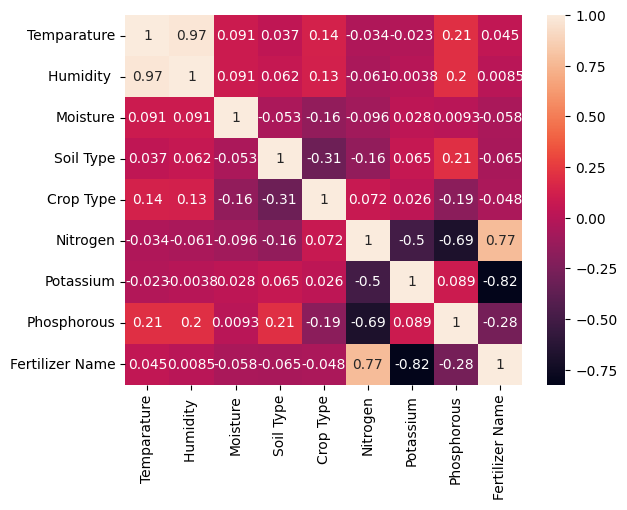

In [41]:
sns.heatmap(df.corr(),annot=True)

In [42]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, test_size=0.2,random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn import datasets, linear_model, metrics
model = linear_model.LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print("Logistic Regression model accuracy(in %):",
metrics.accuracy_score(Y_test, Y_pred)*100)


Logistic Regression model accuracy(in %): 100.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


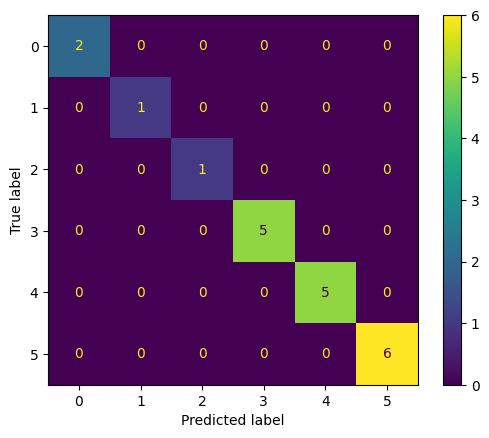

In [46]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm  = confusion_matrix(Y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

In [47]:
from sklearn.metrics import  accuracy_score
print('Accuracy: ',accuracy_score(Y_test,y_pred))

Accuracy:  1.0


In [48]:
y_pred = np.array(pd.DataFrame(y_pred).replace(to,mapping))
y_pred

array([['20-20'],
       ['14-35-14'],
       ['Urea'],
       ['10-26-26'],
       ['17-17-17'],
       ['20-20'],
       ['10-26-26'],
       ['20-20'],
       ['17-17-17'],
       ['10-26-26'],
       ['17-17-17'],
       ['20-20'],
       ['20-20'],
       ['DAP'],
       ['17-17-17'],
       ['10-26-26'],
       ['17-17-17'],
       ['10-26-26'],
       ['Urea'],
       ['10-26-26']], dtype=object)